# Homework  
Data documentation: https://tidyr.tidyverse.org/reference/who.html

__Directions:__ Answer the three questions below. Create as many code/markdown blocks necessary to answer the questions. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re

df = pd.read_csv('https://raw.githubusercontent.com/msaricaumbc/DS_data/master/ds602/who.csv')

In [2]:
df.tail(10)

,country,iso2,iso3,year,new_sp_m014,new_sp_m1524,new_sp_m2534,new_sp_m3544,new_sp_m4554,new_sp_m5564,...,newrel_m4554,newrel_m5564,newrel_m65,newrel_f014,newrel_f1524,newrel_f2534,newrel_f3544,newrel_f4554,newrel_f5564,newrel_f65
7230,Zimbabwe,ZW,ZWE,2004,187.0,833.0,2908.0,2298.0,1056.0,366.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7231,Zimbabwe,ZW,ZWE,2005,210.0,837.0,2264.0,1855.0,762.0,295.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7232,Zimbabwe,ZW,ZWE,2006,215.0,736.0,2391.0,1939.0,896.0,348.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7233,Zimbabwe,ZW,ZWE,2007,138.0,500.0,3693.0,0.0,716.0,292.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7234,Zimbabwe,ZW,ZWE,2008,127.0,614.0,0.0,3316.0,704.0,263.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7235,Zimbabwe,ZW,ZWE,2009,125.0,578.0,NaN,3471.0,681.0,293.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7236,Zimbabwe,ZW,ZWE,2010,150.0,710.0,2208.0,1682.0,761.0,350.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7237,Zimbabwe,ZW,ZWE,2011,152.0,784.0,2467.0,2071.0,780.0,377.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7238,Zimbabwe,ZW,ZWE,2012,120.0,783.0,2421.0,2086.0,796.0,360.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7239,Zimbabwe,ZW,ZWE,2013,NaN,NaN,NaN,NaN,NaN,NaN,...,2349.0,1206.0,1208.0,1252.0,2069.0,4649.0,3526.0,1453.0,811.0,725.0


In [3]:
df = df.drop(columns=['iso2', 'iso3'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7240 entries, 0 to 7239
Data columns (total 58 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   country       7240 non-null   object 
 1   year          7240 non-null   int64  
 2   new_sp_m014   3173 non-null   float64
 3   new_sp_m1524  3209 non-null   float64
 4   new_sp_m2534  3206 non-null   float64
 5   new_sp_m3544  3219 non-null   float64
 6   new_sp_m4554  3223 non-null   float64
 7   new_sp_m5564  3218 non-null   float64
 8   new_sp_m65    3209 non-null   float64
 9   new_sp_f014   3174 non-null   float64
 10  new_sp_f1524  3194 non-null   float64
 11  new_sp_f2534  3200 non-null   float64
 12  new_sp_f3544  3199 non-null   float64
 13  new_sp_f4554  3204 non-null   float64
 14  new_sp_f5564  3195 non-null   float64
 15  new_sp_f65    3197 non-null   float64
 16  new_sn_m014   1045 non-null   float64
 17  new_sn_m1524  1030 non-null   float64
 18  new_sn_m2534  1022 non-null 

## Question 1. We need to know what's included in this data.
- How many countries are present?  
- What's the timespan of the data?  
- Does each country have a row for every year present?  
- Which countries are missing years?  
- How many rows have at least 1 non-null values across the columns 3-57?

#### a. How many countries are present?

In [4]:
unique_countries=df['country'].nunique() #nunique gives number of unique rows in all columns in a dataframe 
#hence subsetting ony required col i.e country.
unique_countries

219

In [5]:
unique_countries=set(df['country'])
len(unique_countries)
#verifying the count

219

There are 219 countries in the data set

#### b. What's the timespan of the data?

In [6]:
min_year=df['year'].min()
min_year

1980

In [7]:
max_year=df['year'].max()
max_year

2013

The timespan of data is 1980 to 2013

#### c.Does each country have a row for every year present?

In [8]:
unique_rows=df[['country','year']].drop_duplicates()
unique_rows

,country,year
0,Afghanistan,1980
1,Afghanistan,1981
2,Afghanistan,1982
3,Afghanistan,1983
4,Afghanistan,1984
...,...,...
7235,Zimbabwe,2009
7236,Zimbabwe,2010
7237,Zimbabwe,2011
7238,Zimbabwe,2012


In [9]:
len_years=df['year'].nunique() #gives the count of unique years
for country in unique_rows['country'].unique():
    #checking if number of rows in unique_rows is same as distinct years
    if len(unique_rows[unique_rows['country']== country]['year']) != len_years:
        print(country,' does not have row for every year')

Bonaire, Saint Eustatius and Saba  does not have row for every year
Curacao  does not have row for every year
Montenegro  does not have row for every year
Netherlands Antilles  does not have row for every year
Serbia  does not have row for every year
Serbia & Montenegro  does not have row for every year
Sint Maarten (Dutch part)  does not have row for every year
South Sudan  does not have row for every year
Timor-Leste  does not have row for every year


In [10]:
unique_rows[unique_rows['country']== 'Bonaire, Saint Eustatius and Saba']
#checking if it is true

,country,year
850,"Bonaire, Saint Eustatius and Saba",2010
851,"Bonaire, Saint Eustatius and Saba",2011
852,"Bonaire, Saint Eustatius and Saba",2012
853,"Bonaire, Saint Eustatius and Saba",2013


Hence all countries does not have a row for every year present

#### d. Which countries are missing years?

In [11]:
len_years=df['year'].nunique() #gives the count of unique years
for country in unique_rows['country'].unique():
    #checking if number of rows in unique_rows is same as distinct years
    if len(unique_rows[unique_rows['country']== country]['year']) != len_years:
        print(country)

Bonaire, Saint Eustatius and Saba
Curacao
Montenegro
Netherlands Antilles
Serbia
Serbia & Montenegro
Sint Maarten (Dutch part)
South Sudan
Timor-Leste


Above countries are missing years

#### e.How many rows have at least 1 non-null values across the columns 3-57?

In [12]:
non_null=df.iloc[:,3:58].dropna(how='all').shape[0]

In [13]:
non_null

3484

## Question 2: Wide data isn't usually helpful.
Convert this to a long format with the following columns:  
1. country  
2. year  
3. diagnosis method: mapping should be: 

```
  {'newsp':'Pulmonary Smear (+)'
  ,'newsn':'Pulmonary Smear (-)'
  ,'newep':'Extrapulmonary'
  ,'newrel':'Relapse'}   
 ```

4. gender: male or female.   
5. age: lower_age - higher_age, e.g., 0-14  
6. number of cases  

__Note__: You can use `replace` (https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html)

In [14]:
# Code
df_long = df.melt(id_vars=['country', 'year'], value_vars=df.columns[2:], 
                var_name='diagnosis method', value_name='number of cases')
#using melt to convert columns into rows
df_long

,country,year,diagnosis method,number of cases
0,Afghanistan,1980,new_sp_m014,NaN
1,Afghanistan,1981,new_sp_m014,NaN
2,Afghanistan,1982,new_sp_m014,NaN
3,Afghanistan,1983,new_sp_m014,NaN
4,Afghanistan,1984,new_sp_m014,NaN
...,...,...,...,...
405435,Zimbabwe,2009,newrel_f65,NaN
405436,Zimbabwe,2010,newrel_f65,NaN
405437,Zimbabwe,2011,newrel_f65,NaN
405438,Zimbabwe,2012,newrel_f65,NaN


In [15]:
df_long['gender']=df_long['diagnosis method'].replace(re.compile("\w+_m\w+"),'m')
#creating a column gender and replacing with 'm' if gender is male

In [16]:
df_long['gender']=df_long['gender'].replace(re.compile("\w+_f\w+"),'f')
# replacing with 'f' if gender is female

In [19]:
df_long['gender'].unique()
#to verify if the column is populated properly or not

array(['m', 'f'], dtype=object)

In [20]:
df_long['diagnosis method']=df_long['diagnosis method'].replace(re.compile("new_sp\w+"),'Pulmonary Smear (+)')
df_long['diagnosis method']=df_long['diagnosis method'].replace(re.compile("new_sn\w+"),'Pulmonary Smear (-)')
df_long['diagnosis method']=df_long['diagnosis method'].replace(re.compile("new_ep\w+"),'Extrapulmonary')
df_long['diagnosis method']=df_long['diagnosis method'].replace(re.compile("newrel\w+"),'Relapse')

In [21]:
df_long['diagnosis method'].unique()

array(['Pulmonary Smear (+)', 'Pulmonary Smear (-)', 'Extrapulmonary',
       'Relapse'], dtype=object)

In [22]:
df_long['age']=2023-df_long['year']
#creating a column age

In [23]:
df_long['age']=df_long['age'].replace([i for i in range(0,15)],'lower_age')
df_long['age']=df_long['age'].replace([i for i in range(15,36)],'middle_age')
df_long['age']=df_long['age'].replace([i for i in range(36,100)],'higher_age')

In [25]:
df_long['age'].unique()
#verifying the column population

array(['higher_age', 'middle_age', 'lower_age'], dtype=object)

In [26]:
df_long.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 405440 entries, 0 to 405439
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   country           405440 non-null  object 
 1   year              405440 non-null  int64  
 2   diagnosis method  405440 non-null  object 
 3   number of cases   76046 non-null   float64
 4   gender            405440 non-null  object 
 5   age               405440 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 18.6+ MB


In [27]:
df_long.head()

,country,year,diagnosis method,number of cases,gender,age
0,Afghanistan,1980,Pulmonary Smear (+),NaN,m,higher_age
1,Afghanistan,1981,Pulmonary Smear (+),NaN,m,higher_age
2,Afghanistan,1982,Pulmonary Smear (+),NaN,m,higher_age
3,Afghanistan,1983,Pulmonary Smear (+),NaN,m,higher_age
4,Afghanistan,1984,Pulmonary Smear (+),NaN,m,higher_age


## Question 3: Create a graph that shows when countries started to report TB cases.

In [28]:
non_null_rows=df_long.dropna() #dropping rows where year is NaN

In [36]:
non_zero=non_null_rows[non_null_rows['number of cases']>0] 
#taking only rows where number of cases >0 i.e countries started to report TB cases

In [37]:
grouped_cols=non_zero.groupby('country')
#grouping based on country

In [38]:
min_years=grouped_cols['year'].min()
#getting min year in each grouped country

In [39]:
min_years=min_years.reset_index(name='year')
min_years

,country,year
0,Afghanistan,1997
1,Albania,1995
2,Algeria,1997
3,American Samoa,1997
4,Andorra,1996
...,...,...
212,Wallis and Futuna Islands,1996
213,West Bank and Gaza Strip,1995
214,Yemen,1995
215,Zambia,1995


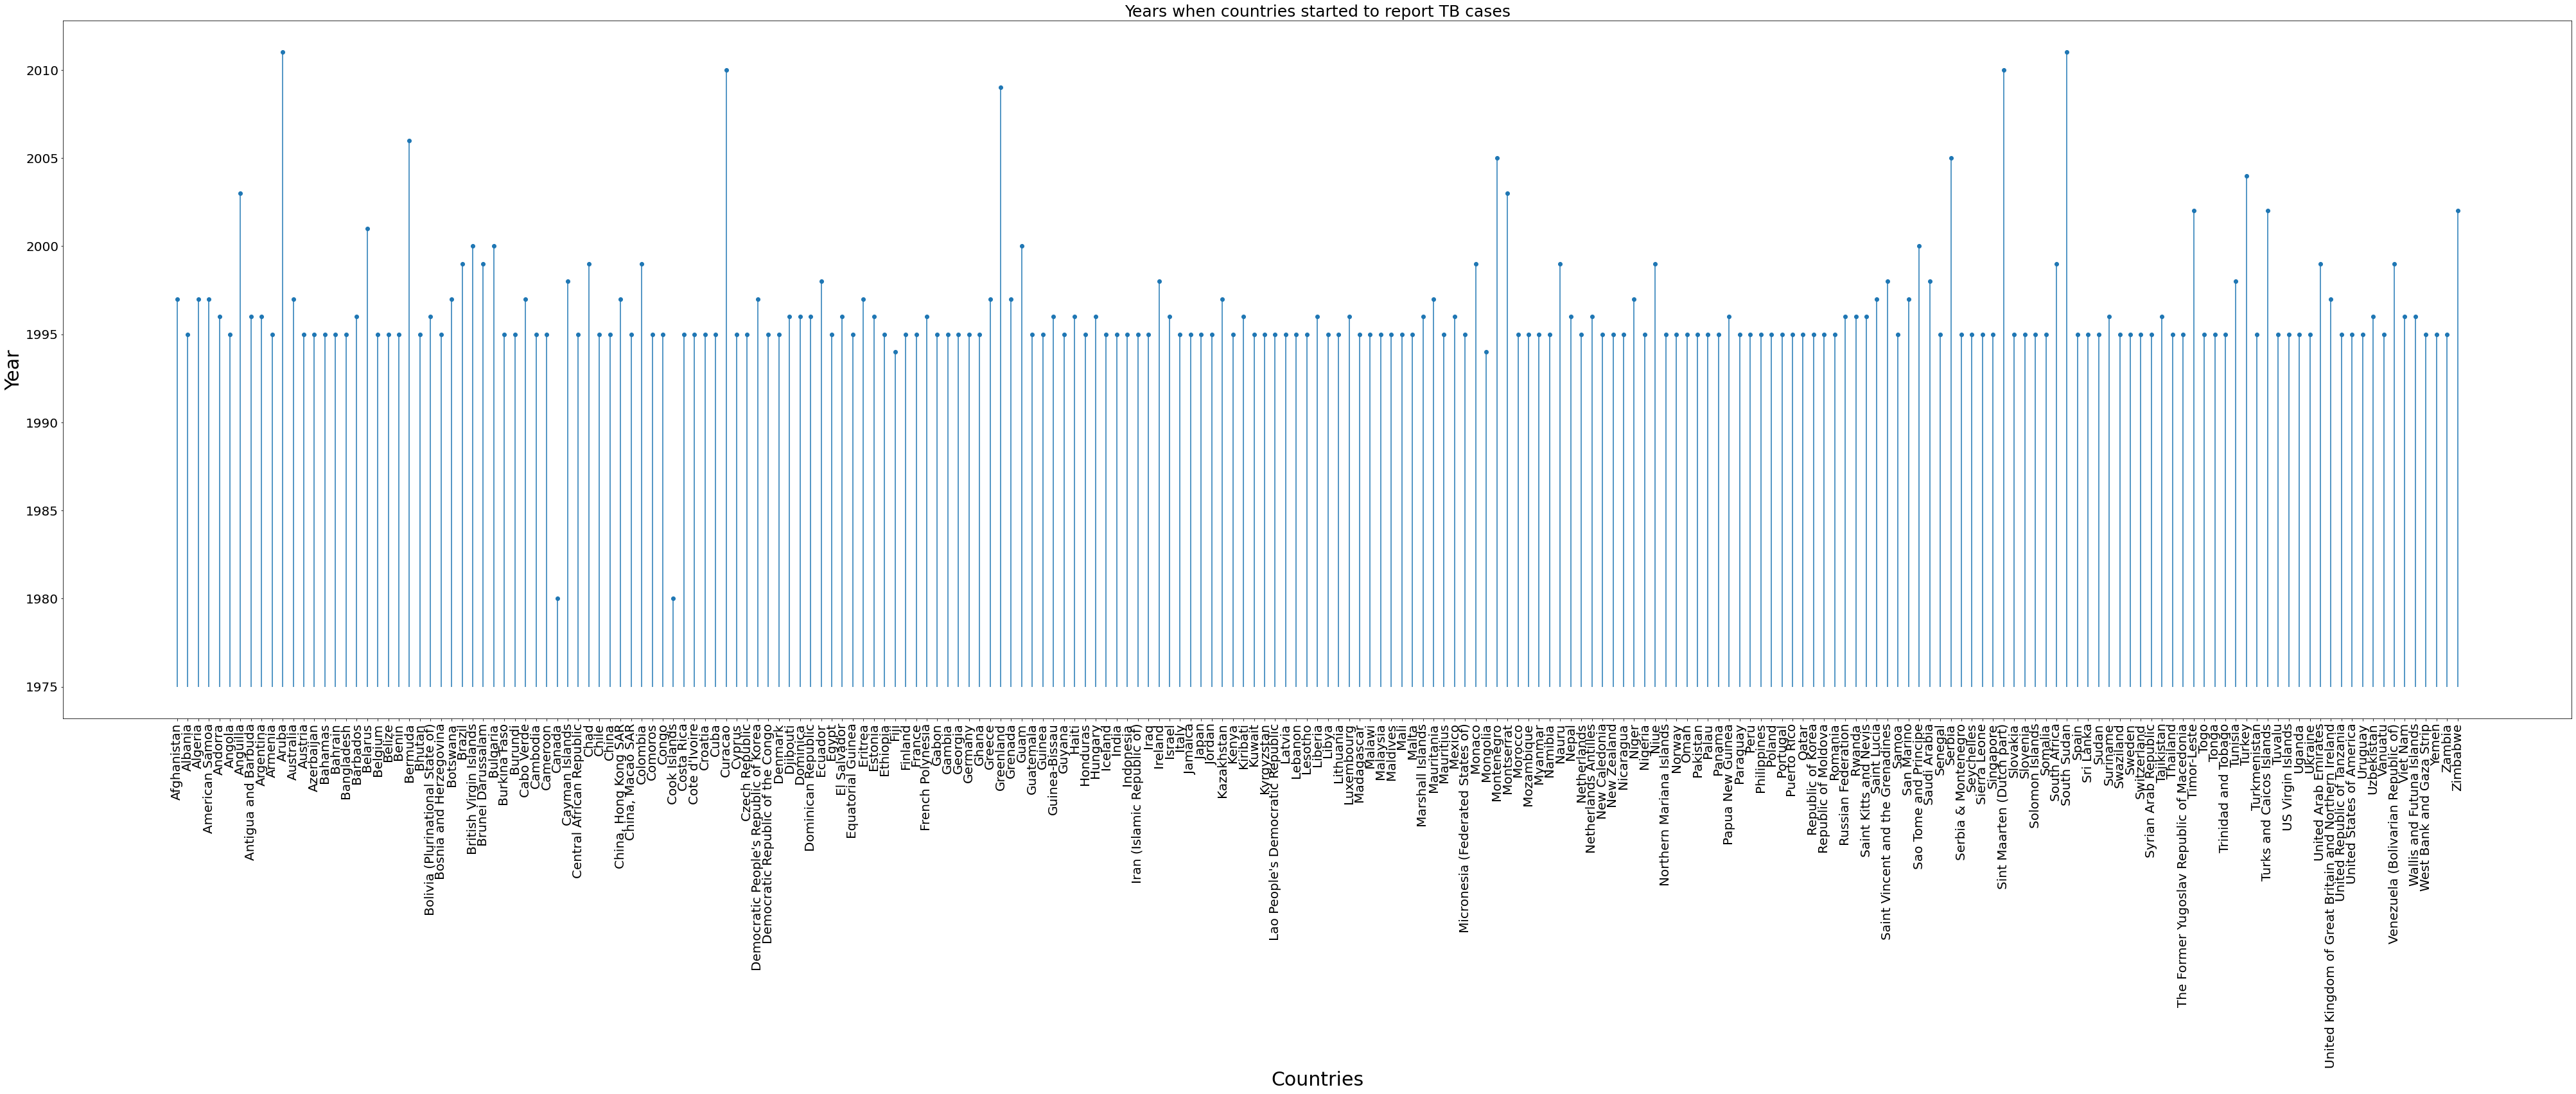

In [40]:
fig, axes = plt.subplots()
 
# drawing the markers (circle)
axes.plot(min_years['country'],  min_years['year'], "o")

for i in range(len(min_years)):
    axes.vlines(i, ymin=1975, ymax=min_years.iloc[i]['year'])
# formatting and details
fig.set_figheight(20)
fig.set_figwidth(70)
plt.title('Years when countries started to report TB cases',fontsize=25)
plt.xlabel('Countries',fontsize=30)
plt.ylabel('Year',fontsize=30)
plt.xticks(min_years['country'],rotation=90, fontsize=20)
plt.yticks(fontsize=20)
plt.show()